# Mobile Price Classification

# Import libraries and read data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
train = pd.read_csv("D:/Mentorness/train.csv")
test  = pd.read_csv("D:/Mentorness/test.csv")

# Data Exploration

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.shape

(2000, 21)

In [5]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
train.info

<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_wid

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [8]:
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [9]:
test.drop('id', axis = 1, inplace = True)

In [10]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
# Looking for missing data

In [12]:
test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [13]:
# looking for duplicates
train.duplicated().sum()

0

In [14]:
# Looking for outliers:

<AxesSubplot:>

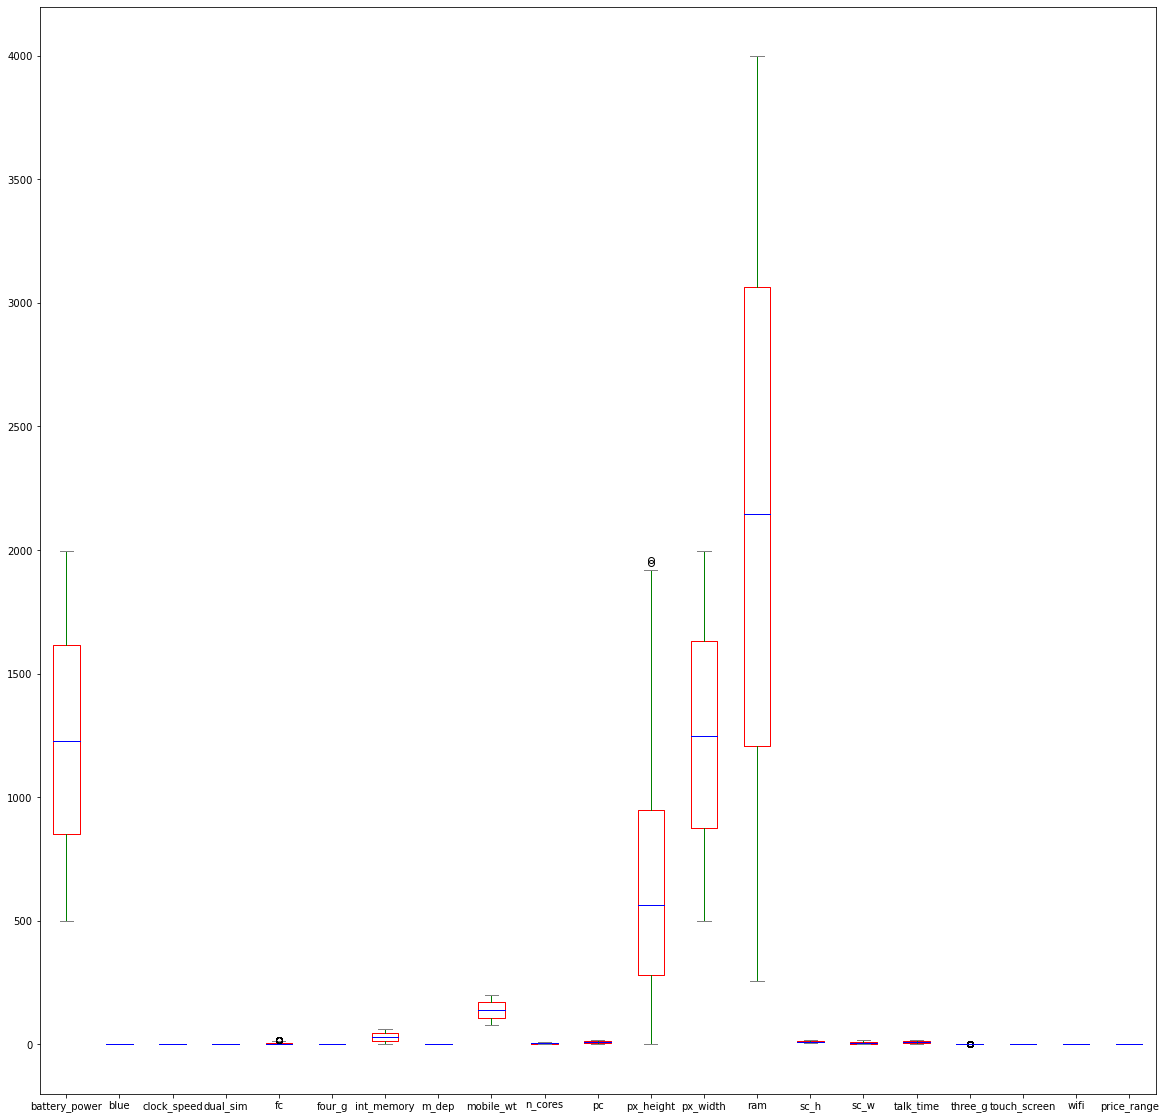

In [15]:
color = {
    'boxes': 'Red',  # Color of the box
    'whiskers': 'Green',  # Color of the whiskers
    'medians': 'Blue',  # Color of the median line
    'caps': 'Gray'  # Color of the caps on whiskers
}

train.plot(kind='box', figsize=(20, 20), color=color)

# Data Visualization

<AxesSubplot:xlabel='price_range', ylabel='count'>

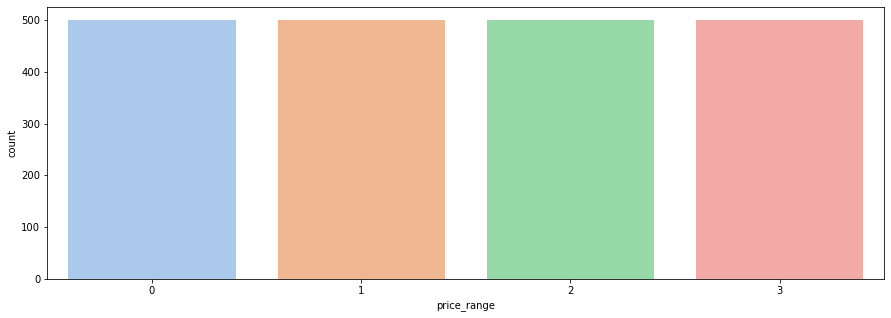

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x=train['price_range'], palette='pastel')

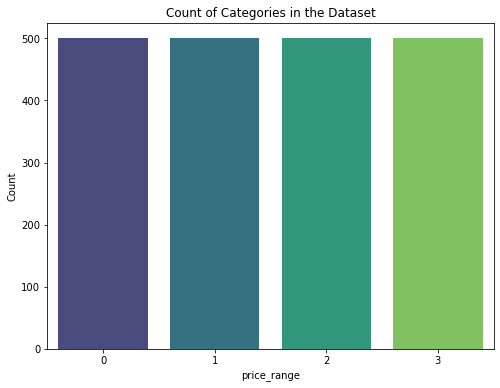

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=train, palette='viridis')

plt.title('Count of Categories in the Dataset')
plt.xlabel('price_range')
plt.ylabel('Count')

plt.show()

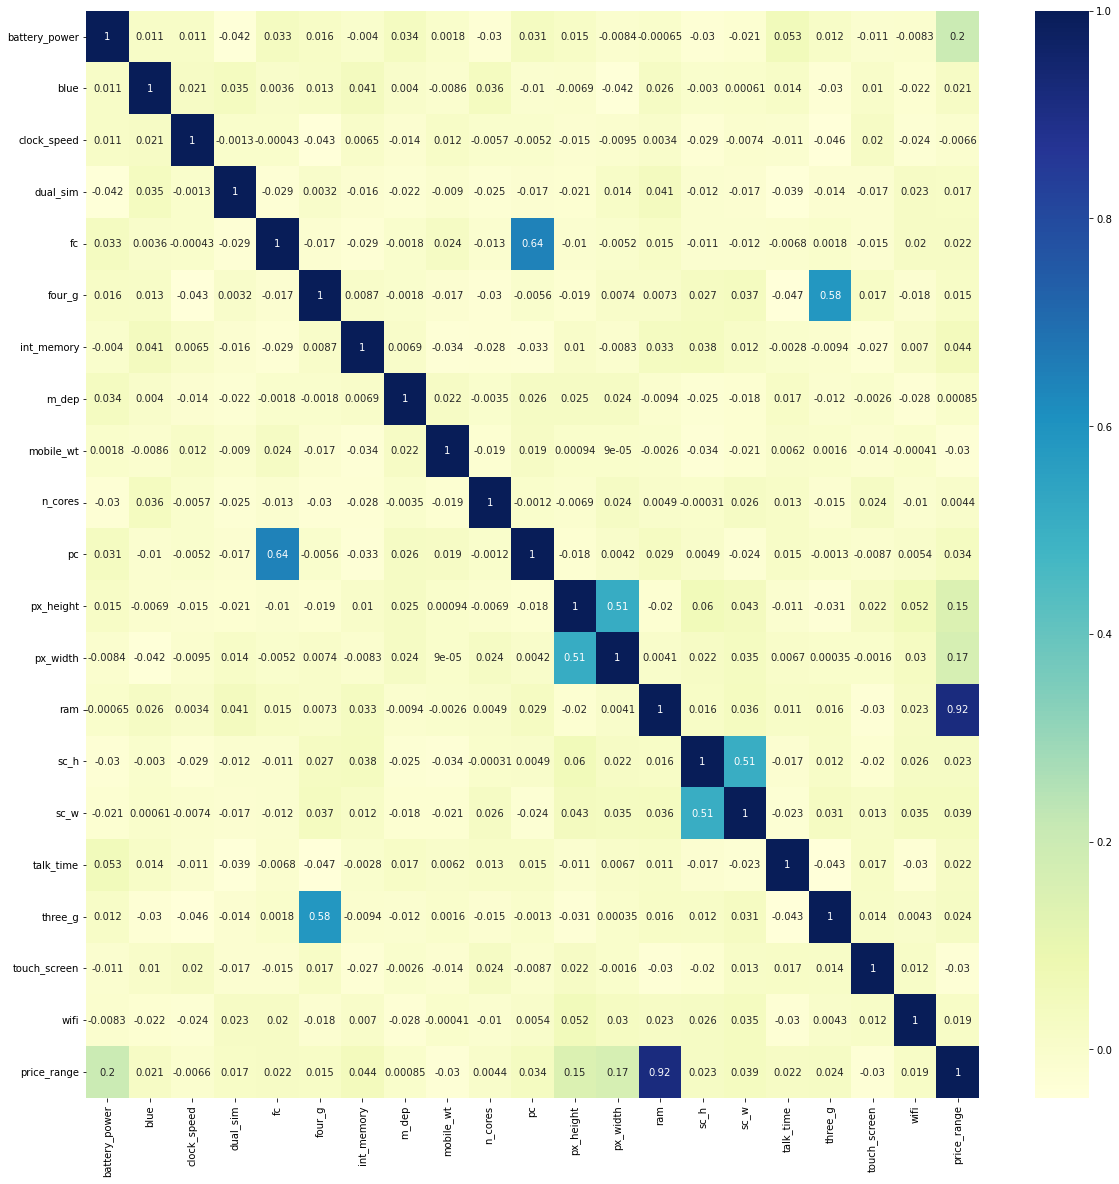

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [19]:
train.corr()['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [20]:
#import pandas as pd
import altair as alt


# Create the Altair chart
chart = alt.Chart(train).mark_bar().encode(
    alt.X('battery_power', bin=True, title='Battery Power'),
    alt.Y('count()', title='Frequency'),
    alt.Color('price_range:N', title='Price Range')
).properties(
    width=400,
    height=300,
    title='Histogram of Battery Power by Price Range'
)

# Display the chart
chart.interactive()


alt.Chart(...)

In [21]:


# Create the Altair chart with tooltips
chart = alt.Chart(train).mark_bar().encode(
    x=alt.X('px_height', bin=True, title='px Height'),
    y=alt.Y('count()', title='Frequency'),
    color=alt.Color('price_range:N', title='Price Range'),
    tooltip=['battery_power:Q', 'price_range:N', 'count()']  # Tooltip shows battery_power, price_range, and count
).properties(
    width=400,
    height=300,
    title='Histogram of px_height by Price Range'
)

# Display the interactive chart
chart.interactive()


alt.Chart(...)

In [22]:

# Create the Altair chart with tooltips
chart = alt.Chart(train).mark_circle().encode(
    x=alt.X('ram:Q', title='RAM'),  # Quantitative axis for RAM
    y=alt.Y('price_range:O', title='Price Range'),  # Ordinal axis for Price Range
    color=alt.Color('price_range:N', title='Price Range'),  # Color encoding based on Price Range
    tooltip=['price_range:N', 'ram:Q']  # Tooltip shows Price Range and RAM
).properties(
    width=400,
    height=300,
    title='Price Range vs. RAM'
).interactive()  # Enable interactivity (hover over points to see details)

# Display the interactive chart
#chart.show()
chart.interactive()

alt.Chart(...)

In [23]:
# Create the Altair chart with tooltips and customized colors
chart = alt.Chart(train).mark_bar().encode(
    x=alt.X('px_width', bin=True, title='px Width'),
    y=alt.Y('count()', title='Frequency'),
    color=alt.Color('price_range:N', title='Price Range', scale=alt.Scale(scheme='dark2')),  # Custom color scheme
    tooltip=['px_width:Q', 'price_range:N', 'count()', 'battery_power:Q']  # Tooltip shows details
).properties(
    width=400,
    height=300,
    title='Histogram of px_width by Price Range'
).interactive()  # Enable interactivity (hover over bars to see details)

# Display the interactive chart
chart.show()


alt.Chart(...)

# Data Preparation

In [24]:
# define x's and y
X= train.drop('price_range', axis=1)
y = train['price_range']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.1, random_state=101)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test = sc.transform(test)

In [28]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("test shape:", test.shape)

X_train shape: (1800, 20)
X_test shape: (200, 20)
test shape: (1000, 20)


In [29]:
X_train

array([[-1.62737257, -0.98675438, -1.01271559, ..., -1.78222729,
        -1.00892875, -0.99888951],
       [-0.75199354,  1.01342342,  0.58093235, ..., -1.78222729,
         0.99115027, -0.99888951],
       [-0.20630271,  1.01342342,  0.70352065, ...,  0.56109566,
        -1.00892875,  1.00111173],
       ...,
       [ 0.69636086,  1.01342342, -0.03200917, ...,  0.56109566,
        -1.00892875, -0.99888951],
       [ 0.83733099, -0.98675438, -1.2578922 , ...,  0.56109566,
        -1.00892875,  1.00111173],
       [ 0.4144206 , -0.98675438, -0.39977408, ...,  0.56109566,
         0.99115027,  1.00111173]])

In [30]:
X_test

array([[ 0.28481903, -0.98675438, -1.2578922 , ...,  0.56109566,
        -1.00892875, -0.99888951],
       [-1.44092821, -0.98675438, -1.2578922 , ...,  0.56109566,
         0.99115027,  1.00111173],
       [-1.49322358, -0.98675438, -0.15459747, ...,  0.56109566,
        -1.00892875,  1.00111173],
       ...,
       [-0.55418061,  1.01342342,  0.33575574, ...,  0.56109566,
        -1.00892875, -0.99888951],
       [ 0.09610095, -0.98675438, -0.89012729, ...,  0.56109566,
         0.99115027,  1.00111173],
       [-1.60690917, -0.98675438,  1.07128556, ...,  0.56109566,
         0.99115027, -0.99888951]])

In [31]:
test

array([[-0.4541373 ,  1.01342342,  0.33575574, ..., -1.78222729,
         0.99115027, -0.99888951],
       [-0.91342707,  1.01342342, -1.2578922 , ...,  0.56109566,
        -1.00892875, -0.99888951],
       [ 1.2829785 ,  1.01342342,  1.56163877, ..., -1.78222729,
         0.99115027,  1.00111173],
       ...,
       [-0.13127022, -0.98675438, -0.15459747, ...,  0.56109566,
        -1.00892875, -0.99888951],
       [ 0.65998148,  1.01342342, -1.2578922 , ..., -1.78222729,
         0.99115027, -0.99888951],
       [ 0.06199528,  1.01342342, -1.2578922 , ...,  0.56109566,
        -1.00892875,  1.00111173]])

# Checking algorithms

In [32]:
# check decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [33]:
pred = dtc.predict(X_test)
pred

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 3, 1,
       2, 3, 2, 2, 2, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 1, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 3, 3, 2, 2, 3, 1, 3, 2,
       0, 1, 0, 2, 1, 2, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 3, 0, 2, 2, 3, 0, 3, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 1, 0, 3, 3, 1, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       1, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 1, 0, 0, 1, 3, 2, 0, 2, 1, 3, 2,
       3, 3, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       1, 2, 3, 1, 2, 1, 0, 1, 3, 3, 1, 2, 1, 3, 1, 0, 2, 2, 0, 3, 0, 0,
       3, 0], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix
dtc_acc = accuracy_score(pred, Y_test)
print(dtc_acc)
print(confusion_matrix(pred, Y_test))

0.845
[[43  3  0  0]
 [ 7 40  7  0]
 [ 0  3 46  2]
 [ 0  0  9 40]]


In [35]:
from sklearn.svm import SVC
knn = SVC()
knn.fit(X_train, Y_train)

SVC()

In [36]:
pred1 = knn.predict(X_test)
pred1

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 3, 1,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 1, 3, 2,
       3, 0, 2, 3, 3, 1, 0, 1, 2, 3, 2, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 1, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 3, 3, 0, 3, 0, 0, 2, 0,
       1, 0, 3, 2, 1, 1, 1, 3, 1, 0, 3, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 3, 2, 0, 2, 0, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 1, 2, 1, 2, 1, 0, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(pred1,Y_test)
print(svc_acc)
print(confusion_matrix(pred1,Y_test))

0.88
[[46  3  0  0]
 [ 4 40  8  0]
 [ 0  3 52  4]
 [ 0  0  2 38]]


In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [39]:
pred2 = lr.predict(X_test)
pred2

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 3, 1,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 0, 1, 3, 3, 1, 0, 0, 3, 3, 3, 3, 1, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 3, 3, 0, 3, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 1, 3, 1, 0, 3, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 3, 2, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(pred2, Y_test)
print(lr_acc)
print(confusion_matrix(pred2, Y_test))

0.955
[[49  1  0  0]
 [ 1 45  3  0]
 [ 0  0 56  1]
 [ 0  0  3 41]]


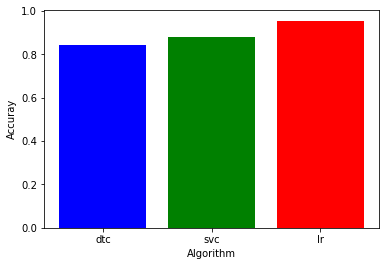

In [41]:
colors = ['blue', 'Green', 'Red']
plt.bar(x = ['dtc', 'svc','lr'], height = [dtc_acc, svc_acc, lr_acc], color = colors)
plt.xlabel('Algorithm')
plt.ylabel('Accuray')
plt.show()

In [42]:
data = {
    'Algorithm': ['dtc', 'svc','lr'],
    'Accuracy': [dtc_acc, svc_acc, lr_acc]
}
print(data)

{'Algorithm': ['dtc', 'svc', 'lr'], 'Accuracy': [0.845, 0.88, 0.955]}


In [43]:
lr.predict(test)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,